# Project: Air pollution clustering

## About the datases:

link to hte dataset at Kaggle: https://www.kaggle.com/adityadeshpande23/pollution-india-2010

This dataset comprises three types of air pollutant in India for specific cities. Additional column is "State". 

Inspiration: derive meaningful insights about the air pollution in India by dividing the data to categories by common properties similarity.

<h4>Steps:</h4>
<ol>
  <li>Data Analysis</li>
  <li>Feature Engineering</li>
  <li>Feature Selection</li>
  <li>Model Training</li>
  <li>Obtaining Predictions / Scoring</li>
</ol>

<b>Dependencies and versions</b>

In [1]:
# importing libraries
from platform import python_version
# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats # for Q-Q plots

import sklearn
from sklearn.preprocessing import MinMaxScaler

import joblib

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)
print('Sklearn version:',sklearn.__version__)
print('Joblib version:',joblib.__version__)

Python version: 3.8.8
NumPy version: 1.20.2
Pandas version: 1.2.4
SciPy version: 1.6.2
Sklearn version: 0.24.1
Joblib version: 1.0.1


<h2>STEP 1: Data analysis</h2>

In [3]:
# importing the dataset
df = pd.read_csv("pollution_india_2010 (1).csv")

In [4]:
# shape
df.shape

(181, 5)

In [5]:
# showing the column names
list(df.columns)

['City', 'NO2', 'PM10', 'SO2', 'State']

In [6]:
# reordering the dataframe columns in convinient order
df = df[['City', 'State', 'NO2', 'PM10', 'SO2']]

In [7]:
# showing first five rows of the dateset
df.head()

,City,State,NO2,PM10,SO2
0,Chitoor,Andhra Pradesh,9,39,4
1,Guntur,Andhra Pradesh,11,81,2
2,Hydrabad,Andhra Pradesh,24,79,5
3,Kothagudem,Andhra Pradesh,11,62,2
4,Kurnool,Andhra Pradesh,9,85,4


In [8]:
# showing data types
df.dtypes

City     object
State    object
NO2      object
PM10     object
SO2      object
dtype: object

In [9]:
# converting numerical columns to float
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')
df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce')

In [10]:
# showing data types
df.dtypes

City      object
State     object
NO2      float64
PM10     float64
SO2      float64
dtype: object

In [11]:
# checking duplicated rows
df.duplicated().sum()

0

In [12]:
# identifying categorical values
# capturing type object
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
cat_vars

['City', 'State']

In [13]:
# casting all variables as categorical
df[cat_vars] = df[cat_vars].astype('O')

<h3>Numerical variables</h3>

In [14]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars]
num_vars

['NO2', 'PM10', 'SO2']

In [15]:
# makink a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by % of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

SO2     0.027624
NO2     0.022099
PM10    0.005525
dtype: float64

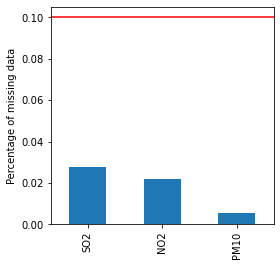

In [16]:
# plot
df[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(4, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.10, color='r', linestyle='-')
plt.show()

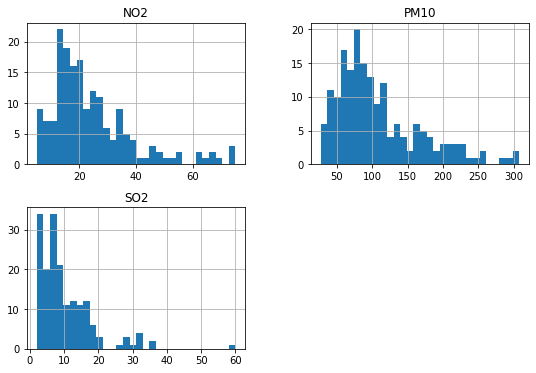

In [17]:
# plotting histograms for all continuous numerical variables
df[num_vars].hist(bins=30, figsize=(9,6))
plt.show()

In [18]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

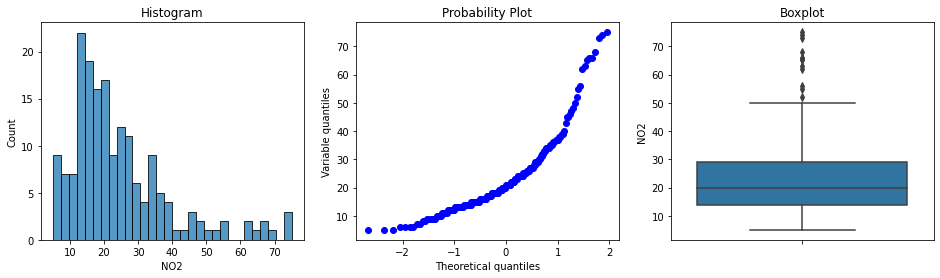

skewnessis of NO2 is 1.52


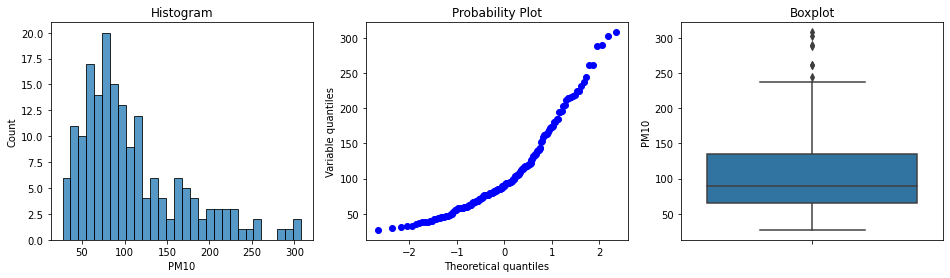

skewnessis of PM10 is 1.20


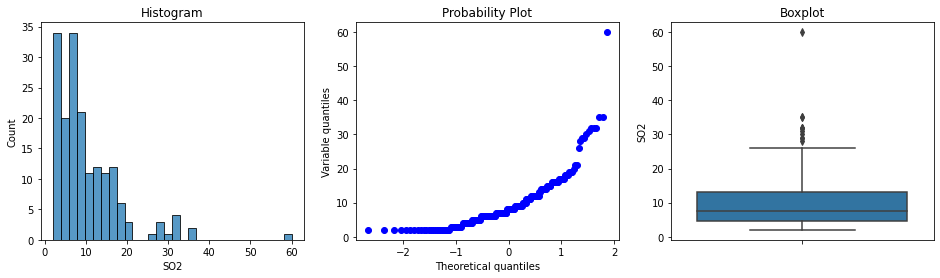

skewnessis of SO2 is 2.24


In [19]:
# plotting NO2 variable
for variable in num_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("skewnessis of", variable, "is {:.2f}".format(skewness))

<b>Yeo-Johnson transformation</b>

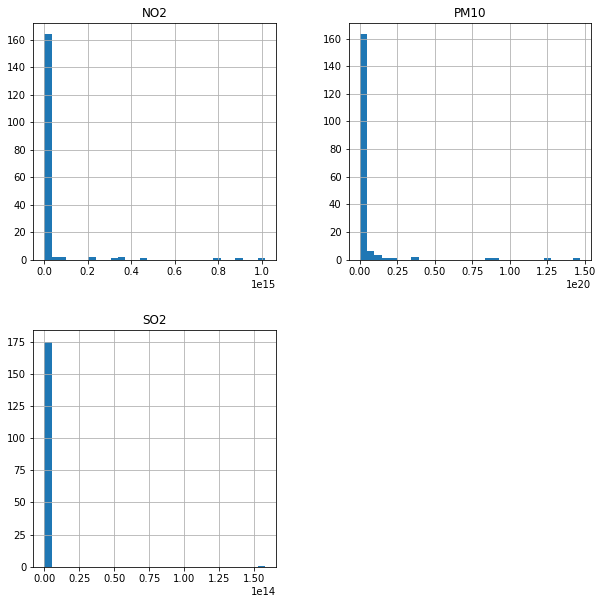

In [20]:
# Analysing the distributions of the variables after applying a Yeo-Johnson transformation

# temporary copy of the data
tmp = df.copy()

for var in num_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[num_vars].hist(bins=30, figsize=(10,10))
plt.show()

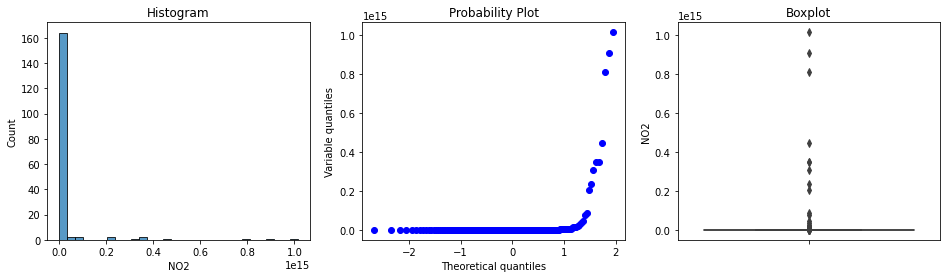

skewness of NO2 is 5.84


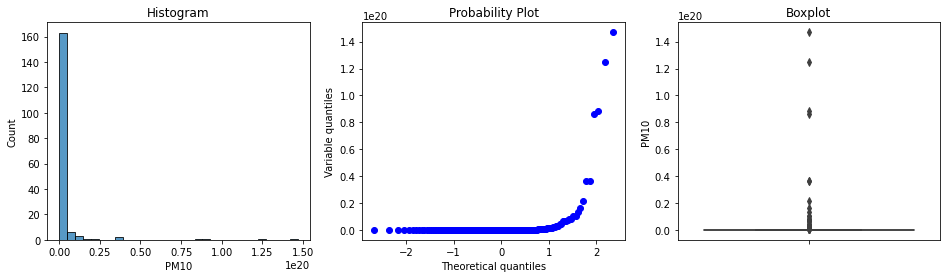

skewness of PM10 is 6.41


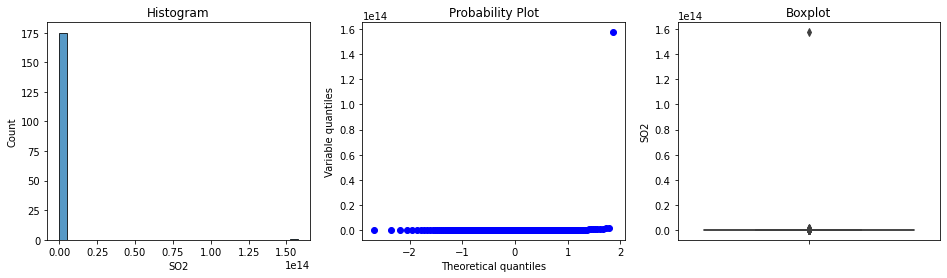

skewness of SO2 is 13.26


In [21]:
# plotting the continuous variables after the Yeo-Johnson transformation
for variable in num_vars:
    diagnostic_plots(tmp, variable)
    # printing skewness
    skewness = tmp[variable].skew()
    print("skewness of", variable, "is {:.2f}".format(skewness))

The Yeo-Johnson transformation didn't improve the distributions

<b>Logarithmic transformation</b>

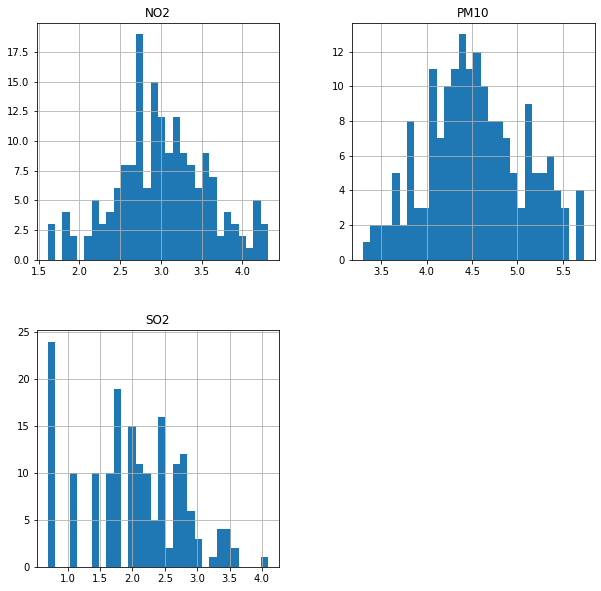

In [22]:
# Analysing the distributions of the variables after applying a logarithmic transformation

# temporary copy of the data
tmp = df.copy()

for var in num_vars:

    # transform the variable - yeo-johsnon
    tmp[var] = np.log(df[var])

    
# plot the histograms of the transformed variables
tmp[num_vars].hist(bins=30, figsize=(10,10))
plt.show()

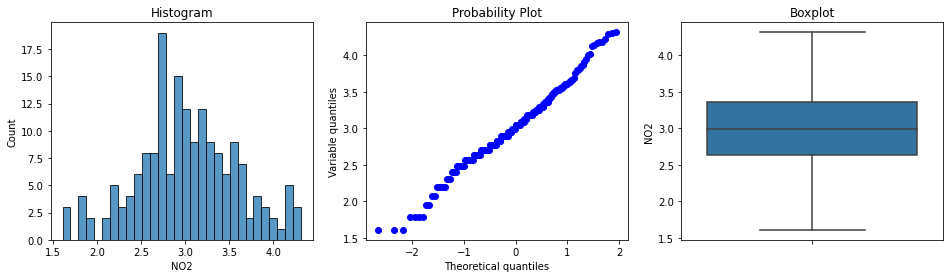

skewness of NO2 is -0.02


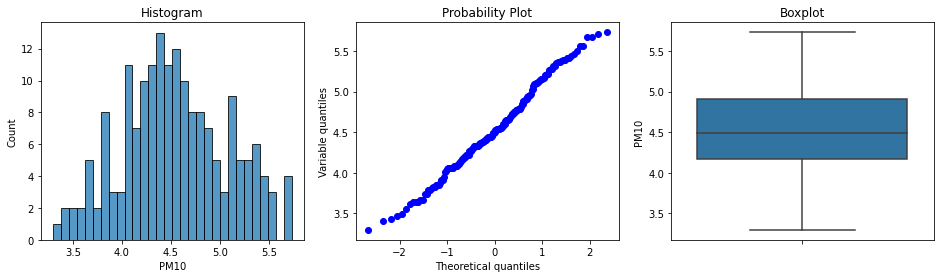

skewness of PM10 is 0.09


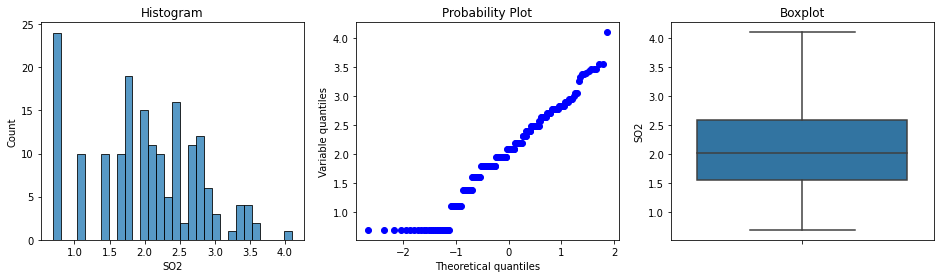

skewness of SO2 is -0.06


In [23]:
# plotting the continuous variables after the logarithmic transformation
for variable in num_vars:
    diagnostic_plots(tmp, variable)
    # printing skewness
    skewness = tmp[variable].skew()
    print("skewness of", variable, "is {:.2f}".format(skewness))

The logarithmic transformation improved the distributions

<h3>Categorical variables</h3>

<AxesSubplot:>

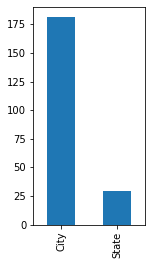

In [24]:
# counting unique categories with pandas unique() 
# and then plotting them in descending order
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(2,4))

<AxesSubplot:>

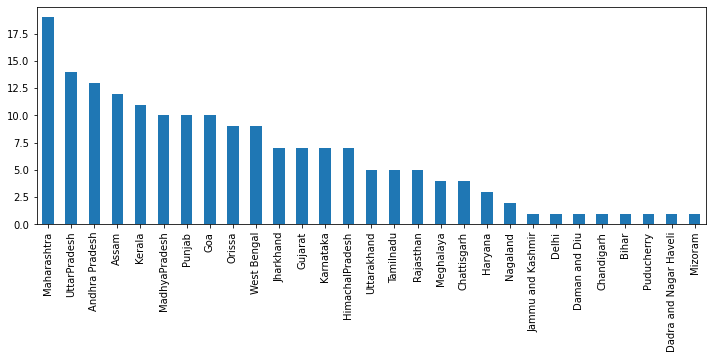

In [25]:
# counting observations per state
df['State'].value_counts().plot.bar(figsize=(12,4))

In [26]:
# calculating mean values per state
df_state = df.groupby('State').mean()
df_state.head()

,NO2,PM10,SO2
State,,,
Andhra Pradesh,14.076923,68.692308,4.615385
Assam,14.750000,69.500000,6.166667
Bihar,40.000000,181.000000,7.000000
Chandigarh,16.000000,92.000000,2.000000
Chattisgarh,26.250000,167.333333,11.250000


Average NO2 per state


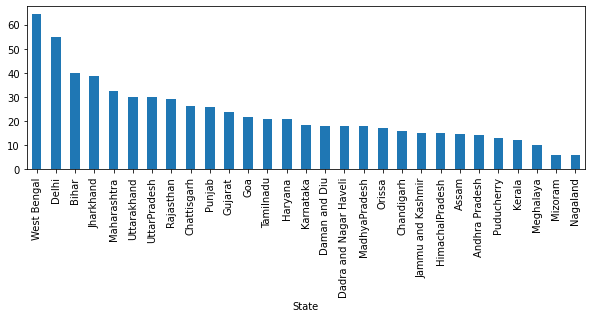

The 5 most polluted states with NO2 are West Bengal Delhi Bihar Jharkhand Maharashtra
The 5 least polluted states with NO2 are Puducherry Kerala Meghalaya Mizoram Nagaland


Average PM10 per state


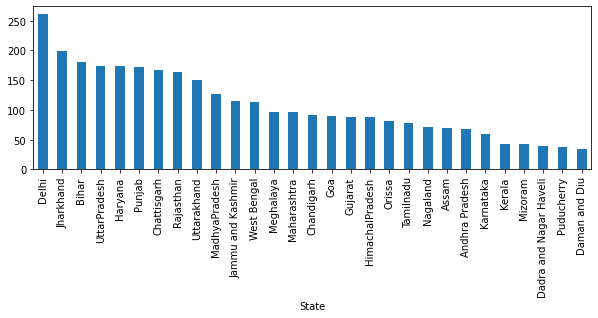

The 5 most polluted states with PM10 are Delhi Jharkhand Bihar UttarPradesh Haryana
The 5 least polluted states with PM10 are Kerala Mizoram Dadra and Nagar Haveli Puducherry Daman and Diu


Average SO2 per state


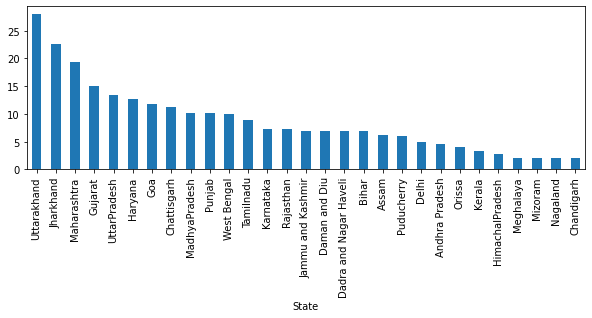

The 5 most polluted states with SO2 are Uttarakhand Jharkhand Maharashtra Gujarat UttarPradesh
The 5 least polluted states with SO2 are HimachalPradesh Meghalaya Mizoram Nagaland Chandigarh




In [27]:
# plotting mean values per state for each pollutant
for variable in df_state.columns:
    print('Average',variable,'per state')
    df_state[variable].sort_values(ascending=False).plot.bar(figsize=(10,3))
    plt.show()
    print('The 5 most polluted states with', variable,'are',*df_state[variable].sort_values(ascending=False).index[:5].tolist())
    print('The 5 least polluted states with', variable,'are',*df_state[variable].sort_values(ascending=False).index[-5:].tolist())
    print('\n')

<h2>STEP 2: Feature engineering</h2>

<b>Missing values</b>

- adding a binary missing indicator variable
- replacing the missing values in the original variable with the mean

In [28]:
# making a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in num_vars
    if df[var].isnull().sum() > 0
]

# print percentage of missing values per variable
df[vars_with_na].isnull().mean()

NO2     0.022099
PM10    0.005525
SO2     0.027624
dtype: float64

In [29]:
# replacing missing values as we described above

for var in vars_with_na:

    # calculating the mean using the train set
    mean_val = df[var].mean()
    
    print(var, mean_val)

    # adding binary missing indicator
    df[var + '_na'] = np.where(df[var].isnull(), 1, 0)

    # replacing missing values by the mean
    df[var].fillna(mean_val, inplace=True)

# checking that there is no more missing values in the engineered variables
df[vars_with_na].isnull().sum()

NO2 24.112994350282484
PM10 108.11111111111111
SO2 9.971590909090908


NO2     0
PM10    0
SO2     0
dtype: int64

In [30]:
# checking the binary missing indicator variables
df[['NO2_na', 'PM10_na', 'SO2_na']].head()

,NO2_na,PM10_na,SO2_na
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


<b>Numerical variable transformation</b>

<b>Logarithmic transformation</b>

In [31]:
for var in num_vars:
    df[var] = np.log(df[var])

In [32]:
# check that data set does not contain null values in the engineered variables
[var for var in num_vars if df[var].isnull().sum() > 0]

[]

<b>Feature Scaling</b>

For use in clustering models, features need to be either scaled. Scaling features to the minimum and maximum values.

In [33]:
# creating scaler
scaler = MinMaxScaler()

#  fittinh  the scaler
scaler.fit(df[num_vars]) 

# transforming the data set

df[num_vars] = pd.DataFrame(
    scaler.transform(df[num_vars]),
    columns=num_vars
)

In [34]:
# showing first five rows of the dateset
df.head()

,City,State,NO2,PM10,SO2,NO2_na,PM10_na,SO2_na
0,Chitoor,Andhra Pradesh,0.217052,0.151062,0.203795,0,0,0
1,Guntur,Andhra Pradesh,0.291153,0.451312,0.000000,0,0,0
2,Hydrabad,Andhra Pradesh,0.579242,0.441042,0.269402,0,0,0
3,Kothagudem,Andhra Pradesh,0.291153,0.341499,0.000000,0,0,0
4,Kurnool,Andhra Pradesh,0.217052,0.471114,0.203795,0,0,0


In [35]:
# saving the scaler

joblib.dump(scaler, 'minmax_scaler.joblib') 

['minmax_scaler.joblib']